<a href="https://colab.research.google.com/github/keeeehun/RL/blob/main/Q_learning(frozen_lake).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import gym
import random
import numpy as np

import matplotlib.pyplot as plt

env = gym.make('FrozenLake-v0')

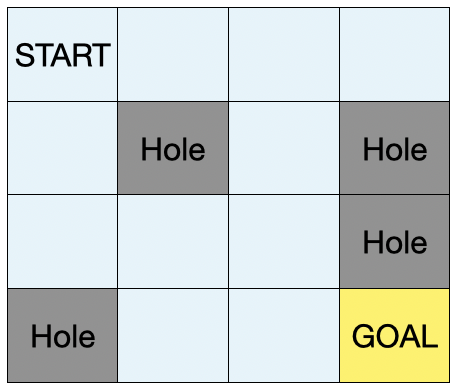


위의 그림에서, START state로부터 시작하여, 회색의 Hole을 피해 노란색의 GOAL에 도달하는 것이 Agent의 목표입니다.

하지만, FrozenLake라는 환경은 바람도 많이 불고, 미끄러지기 쉬워서 변수가 많기 때문에 Agent가 원하는 곳으로만 이동할 수는 없습니다.

(즉, Deterministic이 아닌 Stochcastic model입니다.)

FrozenLake 환경의 State와 Action은 아래와 같으며, env.observation_space와 env.action_space를 통해 각 space의 크기를 확인할 수 있습니다.


## State
- S : starting point, safe
- F : frozen surface, safe
- H : hole, fall to your doom 
- G : goal, where the frisbee is located


## Action
- LEFT : 0
- DOWN : 1
- RIGHT : 2
- UP : 3


In [ ]:
print(env.observation_space)
print(env.action_space)
env.render()

FrozenLake 환경의 Q-Table은, 각 state 별로 4가지 action에 대한 Q값을 보여줘야 하므로, 16 x 4 크기의 grid로 형성됩니다.

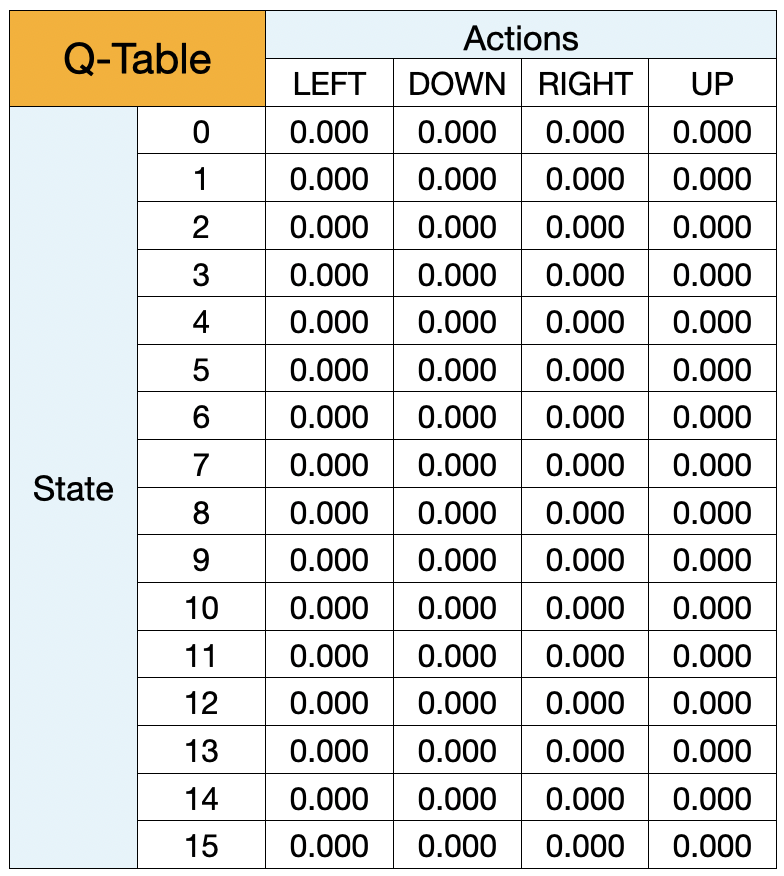

In [ ]:
#Initialize table with all zeros
Q = np.zeros([env.observation_space.n, env.action_space.n])
print(Q)

action 0, 1, 2, 3 이 각각 어떤 방향으로의 이동을 의미하는지 확인할 수 있습니다.

동시에, 해당 방향의 action을 환경에 주더라도 반드시 그 방향으로 이동하는 것이 아님을 알 수 있습니다.

In [ ]:
action_to_str = {0:"LEFT", 1:"DOWN", 2:"RIGHT", 3:"UP"}

obs = env.reset()
env.render()

print('\n------------------------')
for i in range(env.action_space.n):
    action = i
    action_str = action_to_str[action]
    next_obs, reward, done, info = env.step(action)
    env.render()
    print(f"By action {action_str}, from state {obs} to state {next_obs}")
    print("Prob : %.3f episode done? %s" %(info['prob'], done))
    print('------------------------')
    observation = env.reset()

In [ ]:
def print_Q_table(Q, i):
    print(f"episode[{i}] " + "="*15)
    print("  LEFT  DOWN  RIGHT UP")
    print(np.round(Q,3))
    print("="*29)
    print()

In [ ]:
# Set learning parameters
alpha = 0.15   # learning rate
gamma = 0.99   # discount factor
num_episode = 2000

rew_list = []

In [ ]:
for i in range(num_episode):

    if i % 100 == 0:
        print_Q_table(Q, i)
    
    state = env.reset() # Reset environment and get first new observation
    total_reward = 0
    done = False       # end of precess

#   The Q-Table learning algorithm
    while not done:
        # Choose action from state using policy derived from Q
        action = np.argmax(Q[state, :] + np.random.randn(1, env.action_space.n)/(i+1))
        
        #Get new state and reward of action an agent did from environment
        next_state, reward, done, info = env.step(action)
        
        # Update Q-Table
        # Q(s,a) <- (1-alpha)*Q(s,a) + alpha[R + gamma*max_Q(s',a')]
        # Q(s,a) <- Q(s,a) + alpha[R + gamma * max_Q(s',a) - Q(s,a)]
        Q[state, action] = Q[state, action] + alpha*(reward + gamma*np.max(Q[next_state,:]) - Q[state, action])

        total_reward += reward
        state = next_state  # move to next state

    rew_list.append(total_reward)

In [ ]:
print("Success rate : " + str(sum(rew_list) / num_episode))
print("Final Q-Table Values")
print_Q_table(Q, num_episode)